# Alura_care project

My custom code from the project developed in Alura's Machine Learning course.

**This project has the proposal to develop Alura_care, a fictitious startup that aims to reduce the number of tests necessary for the diagnosis of a specific type of cancer.**

This project uses the [Breast Cancer Wisconsin](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29) (Diagnostic) Dataset which features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.

### Load and analyze the data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
SEED = 123143
np.random.seed(SEED)

In [3]:
# Load the data
resultados_exames = pd.read_csv('exames.csv')

In [4]:
resultados_exames

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


In [5]:
# Getting the basic info of the dataset
resultados_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

In [6]:
# Looking for missing data
for column in resultados_exames.columns:
    if resultados_exames[column].isnull().sum() > 0:
        print(f'Column {column} has {resultados_exames[column].isnull().sum()/resultados_exames.shape[0]:.4f} of missing data.')

Column exame_33 has 0.7364 of missing data.


**We can see that the exame_33 column has more than 70% of its data missing. So we will delete that attribute in the dataset because we cannot infer any useful information about it.**

In [7]:
dataset = resultados_exames.drop(columns=['id', 'exame_33'])
dataset

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400


In [8]:
# Getting the basic statistics of the dataset
dataset.describe()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
count,569.000000,569.000000,569.000000,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,1.037800e+02,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,7.860000e-01,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,7.538380e-13,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,1.333440e-15,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,1.037800e+02,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,7.860000e-01,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,1.037800e+02,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,7.860000e-01,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,1.037800e+02,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,7.860000e-01,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,1.037800e+02,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,7.860000e-01,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,1.037800e+02,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,7.860000e-01,0.291000,0.663800,0.207500


### Split the data into train, validation, and test sets

I chose 70% for trainin, 20% for validation and 10% for the final test.

In [9]:
X = dataset.iloc[:, 1:]
X.shape

(569, 32)

In [10]:
y = dataset.iloc[:, 0]
y.shape

(569,)

In [11]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [12]:
train_x.shape

(398, 32)

In [13]:
val_x, test_x, val_y, test_y = train_test_split(test_x, test_y, test_size=0.33, random_state=SEED)

In [14]:
val_x.shape

(114, 32)

In [15]:
test_x.shape

(57, 32)

### Now, we define a dummy classifier to be our baseline

In [16]:
from sklearn.dummy import DummyClassifier

In [17]:
dummy_classifier = DummyClassifier(strategy='most_frequent', random_state=SEED)

In [18]:
dummy_classifier.fit(train_x, train_y)

DummyClassifier(random_state=123143, strategy='most_frequent')

In [19]:
print(f'Accuracy of the dummy classifier: {dummy_classifier.score(val_x, val_y)*100:.2f}%.')

Accuracy of the dummy classifier: 64.04%.


### And here, we create a function to compare with the baseline using a Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
def classifier_rf(train_x, train_y, val_x, val_y, model=False):
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=SEED)
    rf_classifier.fit(train_x, train_y)
    print(f'Accuracy of the RF classifier: {rf_classifier.score(val_x, val_y)*100:.2f}%.')
    
    if model:
        return rf_classifier
    else:
        return None

In [22]:
classifier_rf(train_x, train_y, val_x, val_y)

Accuracy of the RF classifier: 90.35%.


**The RF classifier performed better than the baseline!**

### Let's visually explore the data before trying to reduce the dimensionality.

Melting the dataset with pandas to unpivot the DataFrame from wide to long format e make a violin plot.

In [23]:
dataset_plot_violin = pd.melt(dataset, id_vars=['diagnostico'], value_vars=dataset.columns[1:],
                             var_name='exams', value_name='values')

dataset_plot_violin

,diagnostico,exams,values
0,M,exame_1,17.99000
1,M,exame_1,20.57000
2,M,exame_1,19.69000
3,M,exame_1,11.42000
4,M,exame_1,20.29000
...,...,...,...
18203,M,exame_32,0.07115
18204,M,exame_32,0.06637
18205,M,exame_32,0.07820
18206,M,exame_32,0.12400


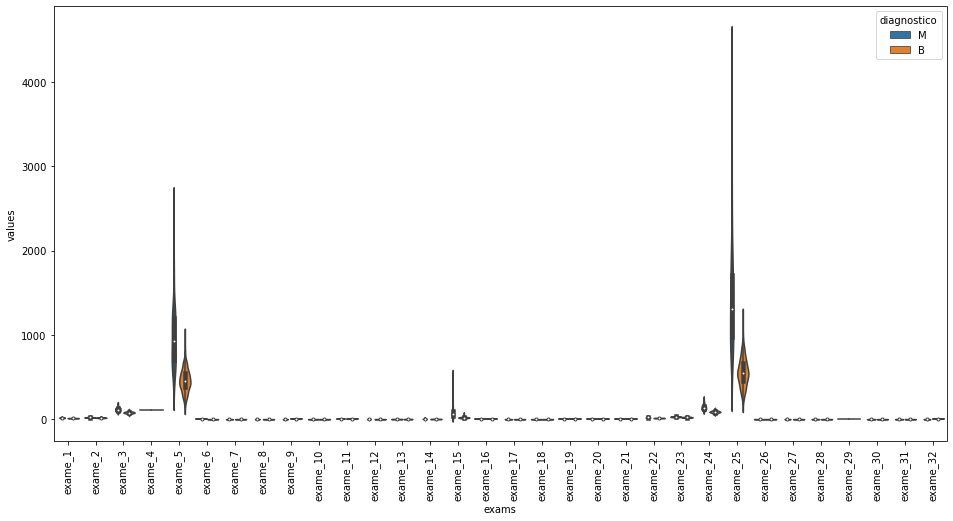

In [24]:
plt.figure(figsize=(16,8))
sns.violinplot(x='exams', y='values', hue='diagnostico', data=dataset_plot_violin)
plt.xticks(rotation = 90);

**To have a better visualization let's split the plot in two.**

We can see that the data a not on the same scale. So let's scale before splitting the plotting.

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dataset.iloc[:, 1:])
dataset_scaled = scaler.transform(dataset.iloc[:, 1:])

dataset_scaled = pd.DataFrame(data=dataset_scaled, columns=dataset.columns[1:])
dataset_scaled.insert(0, value=dataset['diagnostico'], column='diagnostico')

dataset_scaled.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,2.037231,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,1.451707,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,1.428493,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100


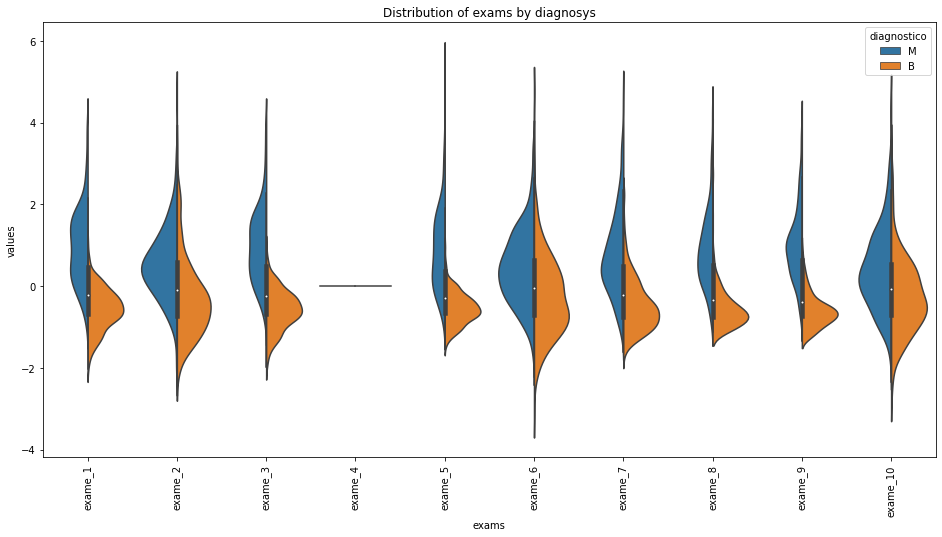

In [26]:
dataset_plot_violin = pd.melt(dataset_scaled, id_vars=['diagnostico'], value_vars=dataset_scaled.columns[1:11],
                             var_name='exams', value_name='values')

plt.figure(figsize=(16,8))
sns.violinplot(x='exams', y='values', hue='diagnostico', data=dataset_plot_violin, split=True)
plt.title('Distribution of exams by diagnosys')
plt.xticks(rotation = 90);

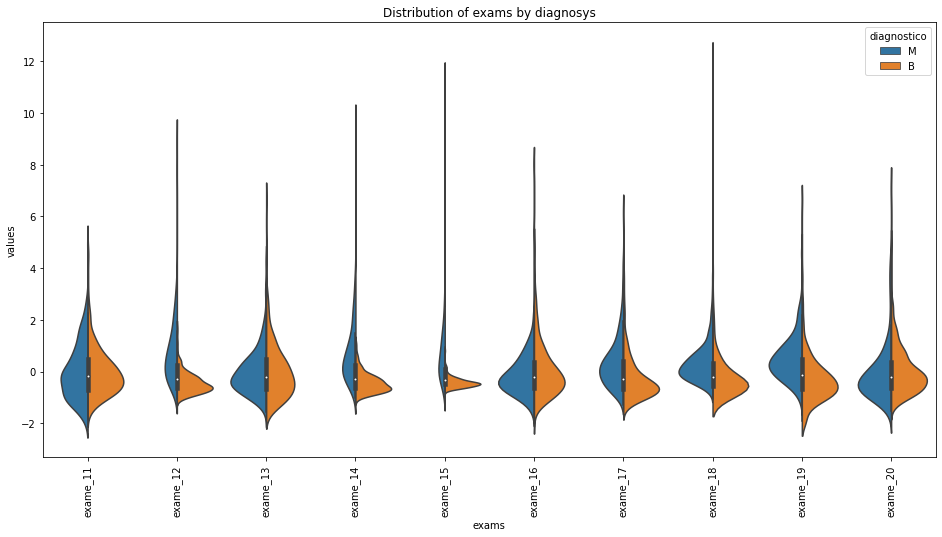

In [27]:
dataset_plot_violin = pd.melt(dataset_scaled, id_vars=['diagnostico'], value_vars=dataset_scaled.columns[11:21],
                             var_name='exams', value_name='values')

plt.figure(figsize=(16,8))
sns.violinplot(x='exams', y='values', hue='diagnostico', data=dataset_plot_violin, split=True)
plt.title('Distribution of exams by diagnosys')
plt.xticks(rotation = 90);

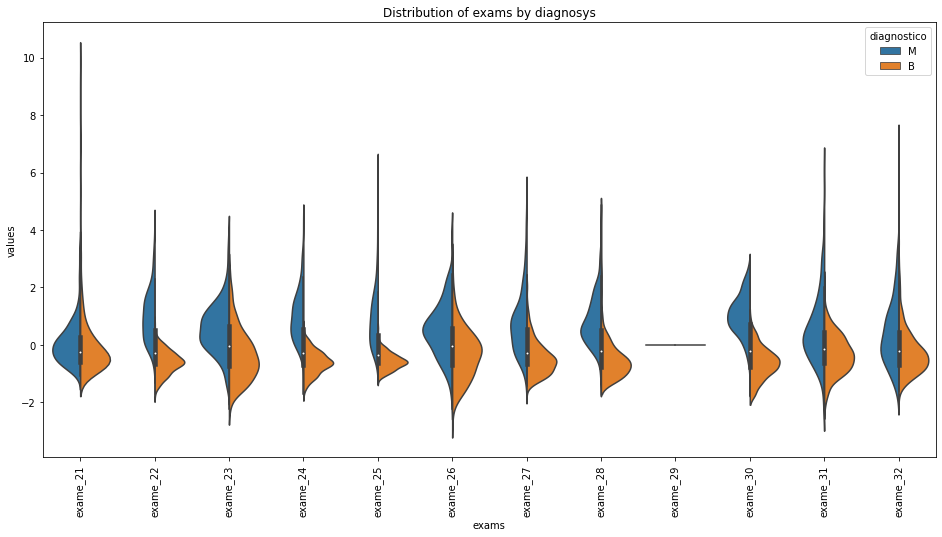

In [28]:
dataset_plot_violin = pd.melt(dataset_scaled, id_vars=['diagnostico'], value_vars=dataset_scaled.columns[21:],
                             var_name='exams', value_name='values')

plt.figure(figsize=(16,8))
sns.violinplot(x='exams', y='values', hue='diagnostico', data=dataset_plot_violin, split=True)
plt.title('Distribution of exams by diagnosys')
plt.xticks(rotation = 90);

We can see that **exame_4** and **exame_29**.

Thus, we can delete them from the dataset.

As we divided the dataset into three, let's remove them from each one of the datasets.

In [29]:
train_x.drop(columns=['exame_4', 'exame_29'], inplace=True)
test_x.drop(columns=['exame_4', 'exame_29'], inplace=True)
val_x.drop(columns=['exame_4', 'exame_29'], inplace=True)

Now, we can retrain a RF classifier with data redeuced.

In [30]:
classifier_rf(train_x, train_y, val_x, val_y)

Accuracy of the RF classifier: 92.11%.


**The result is better than the first one!**

### Let's explore the data correlation to improve dimensionality reduction.

In [31]:
# I will also drop the colums in the original dataset.
dataset.drop(columns=['exame_4', 'exame_29'], inplace=True)

In [32]:
correlation_matrix = dataset.corr()

<AxesSubplot:>

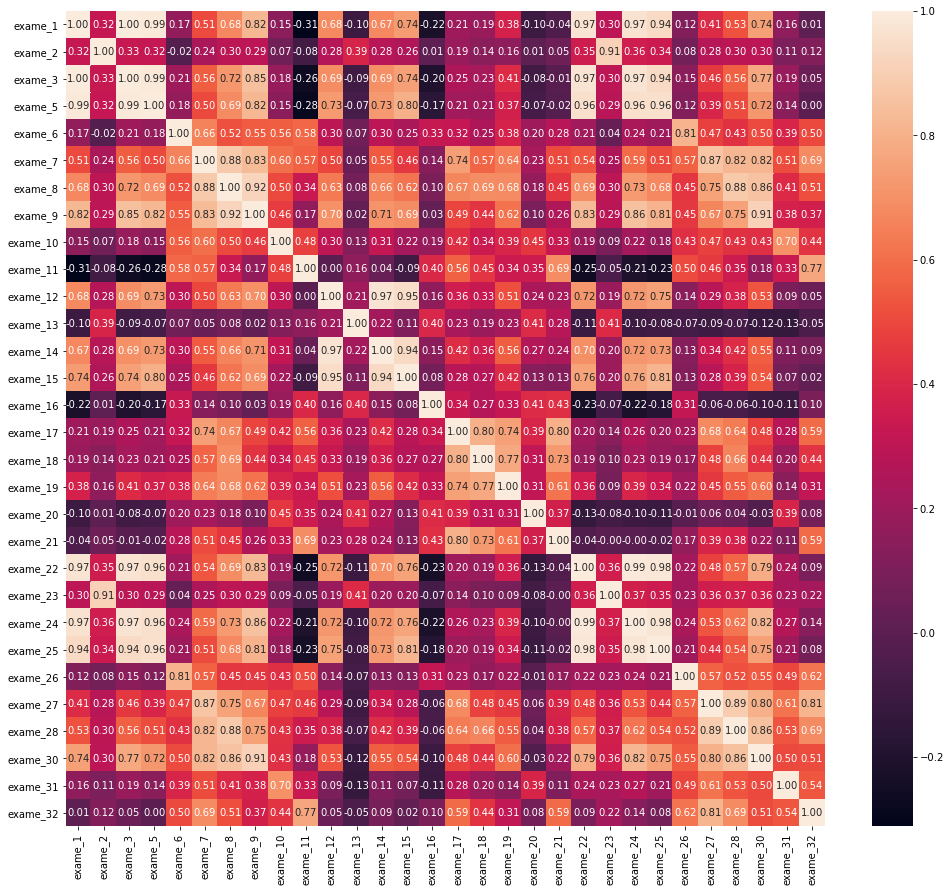

In [33]:
plt.figure(figsize=(17,15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')

Filter the correlation above 0.99.

In [34]:
correlation_matrix[correlation_matrix>.99]

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
high_correlation = correlation_matrix[correlation_matrix[correlation_matrix>.99].sum() > 1].index
high_correlation

Index(['exame_1', 'exame_3', 'exame_22', 'exame_24'], dtype='object')

**Now, let's drop those columns to trai a new RF model and compare.**

In [36]:
train_x.drop(columns=['exame_3', 'exame_24'], inplace=True)
test_x.drop(columns=['exame_3', 'exame_24'], inplace=True)
val_x.drop(columns=['exame_3', 'exame_24'], inplace=True)

In [37]:
train_x.head(2)

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
268,12.87,16.21,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,0.05769,0.2345,...,0.002157,13.90,23.64,597.5,0.1256,0.1808,0.1992,0.0578,0.3604,0.07062
422,11.61,16.02,408.2,0.10880,0.11680,0.07097,0.04497,0.1886,0.06320,0.2456,...,0.001982,12.64,19.67,475.7,0.1415,0.2170,0.2302,0.1105,0.2787,0.07427


In [38]:
classifier_rf(train_x, train_y, val_x, val_y)

Accuracy of the RF classifier: 92.98%.


**The result is a little better. Let's try more dimensionality reduction techniques...**

### Feature selection algorithms

Let's use an algorithm to identify the best features of our data.

#### Select KBest

Select features according to the k highest scores.

In [39]:
from sklearn.feature_selection import SelectKBest, chi2

I am going to use the chi2 function e select the 5 best features.

In [40]:
kbest_selector = SelectKBest(chi2, k=5)

In [41]:
kbest_selector.fit(train_x, train_y)

SelectKBest(k=5, score_func=<function chi2 at 0x0000015CF2F3D280>)

In [42]:
train_x_kbest = kbest_selector.transform(train_x)
val_x_kbest = kbest_selector.transform(val_x)

In [43]:
train_x_kbest.shape

(398, 5)

**What were the features selected?**

The method get_feature_names_out can give us that!

In [44]:
kbest_selected = kbest_selector.get_feature_names_out(kbest_selector.feature_names_in_)

In [45]:
print(f'The features selected were: {kbest_selected}')

The features selected were: ['exame_1' 'exame_5' 'exame_15' 'exame_22' 'exame_25']


**Now, let's make a new training with that features.**

We are going to use the classifier_rf function filtering the input data with the kbest_selected list.

In [46]:
classifier_rf(train_x[kbest_selected], train_y, val_x[kbest_selected], val_y)

Accuracy of the RF classifier: 96.49%.


**The accuracy of the Random Forest model improved, but we need to check the confusion matrix and analyze how better the model is based on other metrics, not just the accuracy.**

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [48]:
model = classifier_rf(train_x[kbest_selected], train_y, val_x[kbest_selected], val_y, model=True)

Accuracy of the RF classifier: 96.49%.


In [49]:
y_pred = model.predict(val_x[kbest_selected])

In [50]:
conf_matrix = confusion_matrix(val_y, y_pred)
conf_matrix

array([[71,  2],
       [ 2, 39]], dtype=int64)

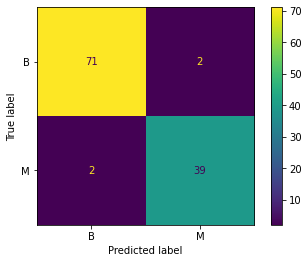

In [51]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_).plot()

We can see that, out of 41 malign samples, the model is classifying 2 samples as benign. That can be dangerous when we are talking about cancer detection. So let's see if we can reduce that misclassification.

#### Recursive Feature Elimination (RFE)

Let's use the recursive feature elimination algorithm to reduce the dimensionality of the dataset and then train again.

In [52]:
from sklearn.feature_selection import RFE

In [53]:
# Creating a new rf classifier to use the RFE method
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=SEED)
rf_classifier.fit(train_x, train_y)

RandomForestClassifier(random_state=123143)

In [54]:
# Creating and training the selector
rfe_selector = RFE(rf_classifier, n_features_to_select=5, step=1)
rfe_selector.fit(train_x, train_y)

RFE(estimator=RandomForestClassifier(random_state=123143),
    n_features_to_select=5)

In [55]:
# Transforming the data with the selector
train_x_rfe = rfe_selector.transform(train_x)
val_x_rfe = rfe_selector.transform(val_x)

In [56]:
# Looking for the features selected
rfe_best_features = rfe_selector.get_feature_names_out(rfe_selector.feature_names_in_)

print(f'The features selected were: {rfe_best_features}')

The features selected were: ['exame_8' 'exame_9' 'exame_22' 'exame_25' 'exame_30']


**Now, the features are different. Let's see the predictions.**

In [57]:
model = classifier_rf(train_x[rfe_best_features], train_y, val_x[rfe_best_features], val_y, model=True)

Accuracy of the RF classifier: 92.11%.


In [58]:
y_pred = model.predict(val_x[rfe_best_features])

In [59]:
conf_matrix = confusion_matrix(val_y, y_pred)
conf_matrix

array([[69,  4],
       [ 5, 36]], dtype=int64)

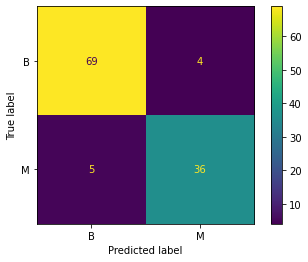

In [60]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_).plot()

Choosing the 5 best features, the rfe seems not to be best option.

Is there any technique that tells us which feature set will generate the best result?

For this we will use the RFECV technique

#### Recursive feature elimination with cross-validation (RFECV)

In [61]:
from sklearn.feature_selection import RFECV

In [62]:
# Creating a new rf classifier to use the RFECV method
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=SEED)
rf_classifier.fit(train_x, train_y)

RandomForestClassifier(random_state=123143)

In [63]:
# Creating and training the selector
rfecv_selector = RFECV(rf_classifier, cv=5, step=1, scoring='accuracy')
rfecv_selector.fit(train_x, train_y)

RFECV(cv=5, estimator=RandomForestClassifier(random_state=123143),
      scoring='accuracy')

In [64]:
# Transforming the data with the selector
train_x_rfecv = rfecv_selector.transform(train_x)
val_x_rfecv = rfecv_selector.transform(val_x)

In [65]:
# Looking for the features selected
rfecv_best_features = rfecv_selector.get_feature_names_out(rfecv_selector.feature_names_in_)

print(f'The features selected were: {rfecv_best_features}')

The features selected were: ['exame_1' 'exame_2' 'exame_5' 'exame_6' 'exame_7' 'exame_8' 'exame_9'
 'exame_12' 'exame_14' 'exame_15' 'exame_18' 'exame_21' 'exame_22'
 'exame_23' 'exame_25' 'exame_26' 'exame_27' 'exame_28' 'exame_30'
 'exame_31' 'exame_32']


Now, the features are different. Let's see the predictions.

In [66]:
model = classifier_rf(train_x[rfecv_best_features], train_y, val_x[rfecv_best_features], val_y, model=True)

Accuracy of the RF classifier: 92.11%.


In [67]:
y_pred = model.predict(val_x[rfecv_best_features])

In [68]:
conf_matrix = confusion_matrix(val_y, y_pred)
conf_matrix

array([[69,  4],
       [ 5, 36]], dtype=int64)

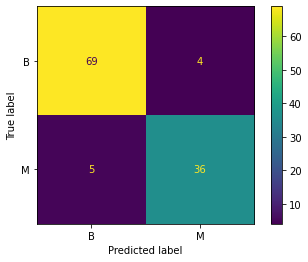

In [69]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_).plot()

The result was the same as the RFE. We did not achieve an improvement.

Now, we will make a plot of the selector and see the accuracy of each configuration.

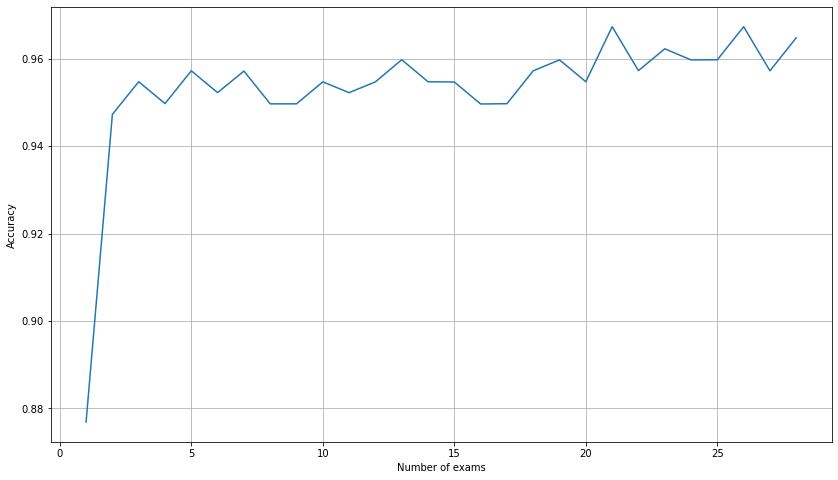

In [70]:
plt.figure(figsize=(14,8))
plt.xlabel('Number of exams')
plt.ylabel('Accuracy')
plt.grid(True)
plt.plot(range(1,len(rfecv_selector.cv_results_['mean_test_score'])+1), rfecv_selector.cv_results_['mean_test_score'])

In [71]:
rfecv_selector.cv_results_['mean_test_score']

array([0.87686709, 0.94727848, 0.95474684, 0.94974684, 0.95724684,
       0.95224684, 0.95718354, 0.94968354, 0.94968354, 0.95471519,
       0.95224684, 0.95471519, 0.95977848, 0.95474684, 0.95468354,
       0.9496519 , 0.94971519, 0.95724684, 0.95974684, 0.95474684,
       0.96734177, 0.95727848, 0.96227848, 0.95974684, 0.95977848,
       0.96734177, 0.95724684, 0.96481013])

### Visualizing the data on the graph

#### Feature selection with 2 features.

Accuracy of the RF classifier: 90.35%.


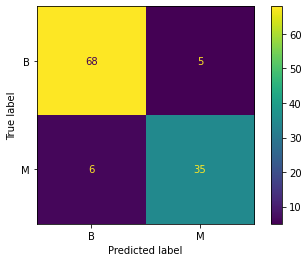

In [72]:
# Creating a new rf classifier to use the RFE method
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=SEED)
rf_classifier.fit(train_x, train_y)

rfe_selector = RFE(rf_classifier, n_features_to_select=2, step=1)
rfe_selector.fit(train_x, train_y)

train_x_rfe = rfe_selector.transform(train_x)
val_x_rfe = rfe_selector.transform(val_x)

rfe_best_features = rfe_selector.get_feature_names_out(rfe_selector.feature_names_in_)

model = classifier_rf(train_x[rfe_best_features], train_y, val_x[rfe_best_features], val_y, model=True)

y_pred = model.predict(val_x[rfe_best_features])

conf_matrix = confusion_matrix(val_y, y_pred)

ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_).plot()

<AxesSubplot:xlabel='exame_22', ylabel='exame_30'>

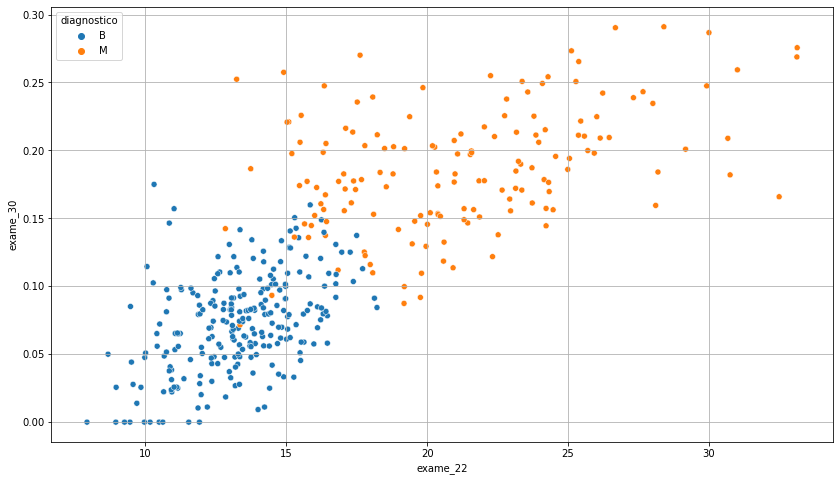

In [73]:
plt.figure(figsize=(14,8))
plt.grid(True)
sns.scatterplot(x=train_x[rfe_best_features].iloc[:,0], y=train_x[rfe_best_features].iloc[:,1], hue=train_y)

**With that plot, we lose a lot of information from the data. So, let's use the decomposition with PCA e TSNE methods to improve that**

#### Principal component analysis (PCA).

We will use the PCA with the scaled data.

In [74]:
from sklearn.decomposition import PCA

In [75]:
pca = PCA(n_components=2, random_state=SEED)

In [76]:
# Scaling the data
scaler = StandardScaler()
scaler.fit(train_x)
train_x_scaled = scaler.transform(train_x)

In [77]:
train_x_pca = pca.fit_transform(train_x_scaled)

In [78]:
train_x_pca

array([[-2.33220988e+00,  2.35066996e-01],
       [-1.53419796e+00,  7.71944814e-01],
       [ 4.28250169e+00, -2.38715169e+00],
       [ 2.95588816e+00,  2.78119730e+00],
       [ 7.66973165e+00, -1.43130089e+00],
       [-7.04413468e-01,  2.37188281e+00],
       [-2.06810611e+00,  6.82161707e-01],
       [-9.38009909e-01,  7.12550587e-01],
       [-3.18420820e+00,  2.08315509e-01],
       [-1.43929198e+00,  3.49334540e-01],
       [ 3.81220169e+00, -1.83486038e+00],
       [-3.84710983e-01, -1.34848687e-01],
       [-2.72382206e+00,  4.75215472e-01],
       [-2.11448359e+00, -6.45206121e-01],
       [ 1.01293853e+00, -2.36534016e+00],
       [-2.98031385e+00, -1.65100598e-01],
       [-2.71023524e+00, -4.60026500e-01],
       [ 2.69088852e-01,  2.04988947e-01],
       [ 1.19349770e+01,  6.38556891e-01],
       [ 4.80239212e-01,  1.87943423e+00],
       [ 6.67170891e+00,  1.01059754e+00],
       [-1.88755771e+00,  8.63365780e-01],
       [-2.38595681e+00, -4.61682330e-01],
       [ 3.

<AxesSubplot:>

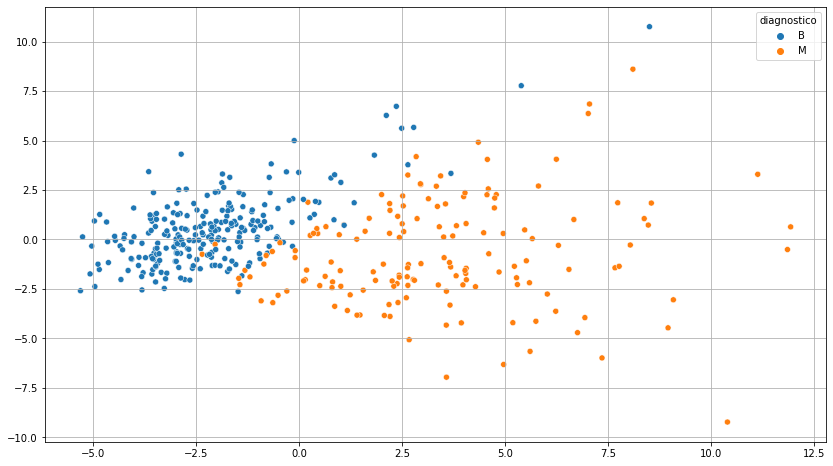

In [79]:
plt.figure(figsize=(14,8))
plt.grid(True)
sns.scatterplot(x=train_x_pca[:,0], y=train_x_pca[:,1], hue=train_y)

#### T-distributed Stochastic Neighbor Embedding (T-sne)

In [80]:
from sklearn.manifold import TSNE

In [81]:
tsne = TSNE(n_components=2, random_state=SEED)

In [82]:
# Scaling the data
#scaler = StandardScaler()
#scaler.fit(train_x)
#train_x_scaled = scaler.transform(train_x)

In [83]:
train_x_tsne = tsne.fit_transform(train_x_scaled)

C:\Users\81019188\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\81019188\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:>

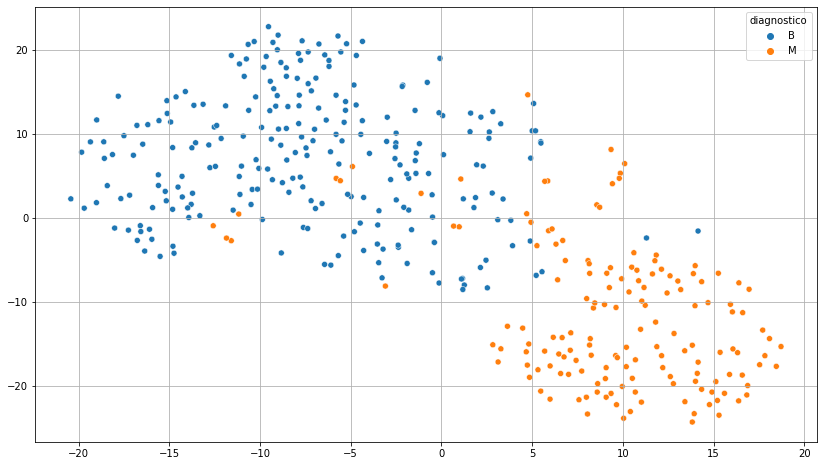

In [84]:
plt.figure(figsize=(14,8))
plt.grid(True)
sns.scatterplot(x=train_x_tsne[:,0], y=train_x_tsne[:,1], hue=train_y)

The visualizations are better and more accurate than the visualization with just feature selection.

**Now, Let's train a new model with the data transformed by the PCA method**

In [85]:
# First lets scale the x_val
val_x_scaled = scaler.transform(val_x)

In [86]:
val_x_pca = pca.transform(val_x_scaled)

In [87]:
model = classifier_rf(train_x_scaled, train_y, val_x_scaled, val_y, model=True)

Accuracy of the RF classifier: 92.98%.


In [88]:
y_pred = model.predict(val_x_scaled)

In [89]:
conf_matrix = confusion_matrix(val_y, y_pred)

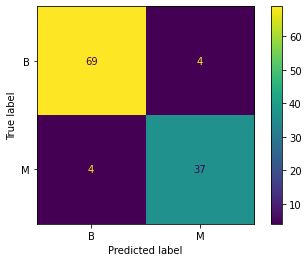

In [90]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_).plot()

The result is very close to the last ones, with not much improvement.

### Final decision

With all the analysis made, I say that the best generator with 5 features was the best because I achieved the best accuracy and the more accurate classifications of malign cancer.

Let's do it again.

In [91]:
last_model = classifier_rf(train_x[kbest_selected], train_y, val_x[kbest_selected], val_y, model=True)

Accuracy of the RF classifier: 96.49%.


In [92]:
y_pred = last_model.predict(val_x[kbest_selected])

conf_matrix = confusion_matrix(val_y, y_pred)

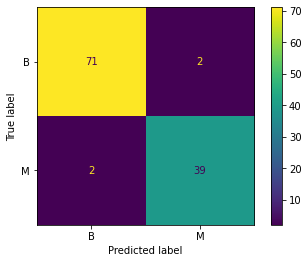

In [93]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=last_model.classes_).plot()

Now, I will apply the model in the test set to make the final validation.

In [94]:
y_pred_final = last_model.predict(test_x[kbest_selected])

In [95]:
final_score = last_model.score(test_x[kbest_selected], test_y)
print(f'Final score of the model is: {final_score:.2f}')

Final score of the model is: 0.96


In [96]:
conf_matrix_final = confusion_matrix(test_y, y_pred_final)
conf_matrix_final

array([[41,  0],
       [ 2, 14]], dtype=int64)

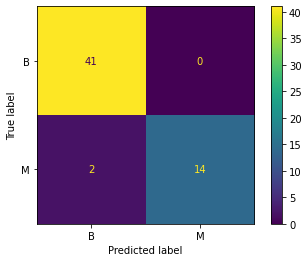

In [97]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_final, display_labels=last_model.classes_).plot()

### Final considerations:

- The tests showed how important is to analyze the data and understand how important are the features for training a machine learning model;

- The purpose to reduce the dimensionality of the dataset was achieved and the accuracy of the model was much better than the baseline;

- The model was more accurate to detect the benign class, with no errors. 

- Out of 16 malign samples, the model classified 2 samples as benign. That gives us 12.5% of misclassifications for the malign class.

- More changes can be made to compare the results, like choosing another ML model, stratifying the data on the split, or using cross-validation in training.